In [1]:
# DATA Analysis Cluster - HDFS, MapRed, Hive 

#import modules 

from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2 
from diagrams.onprem.analytics import Hadoop,Hive

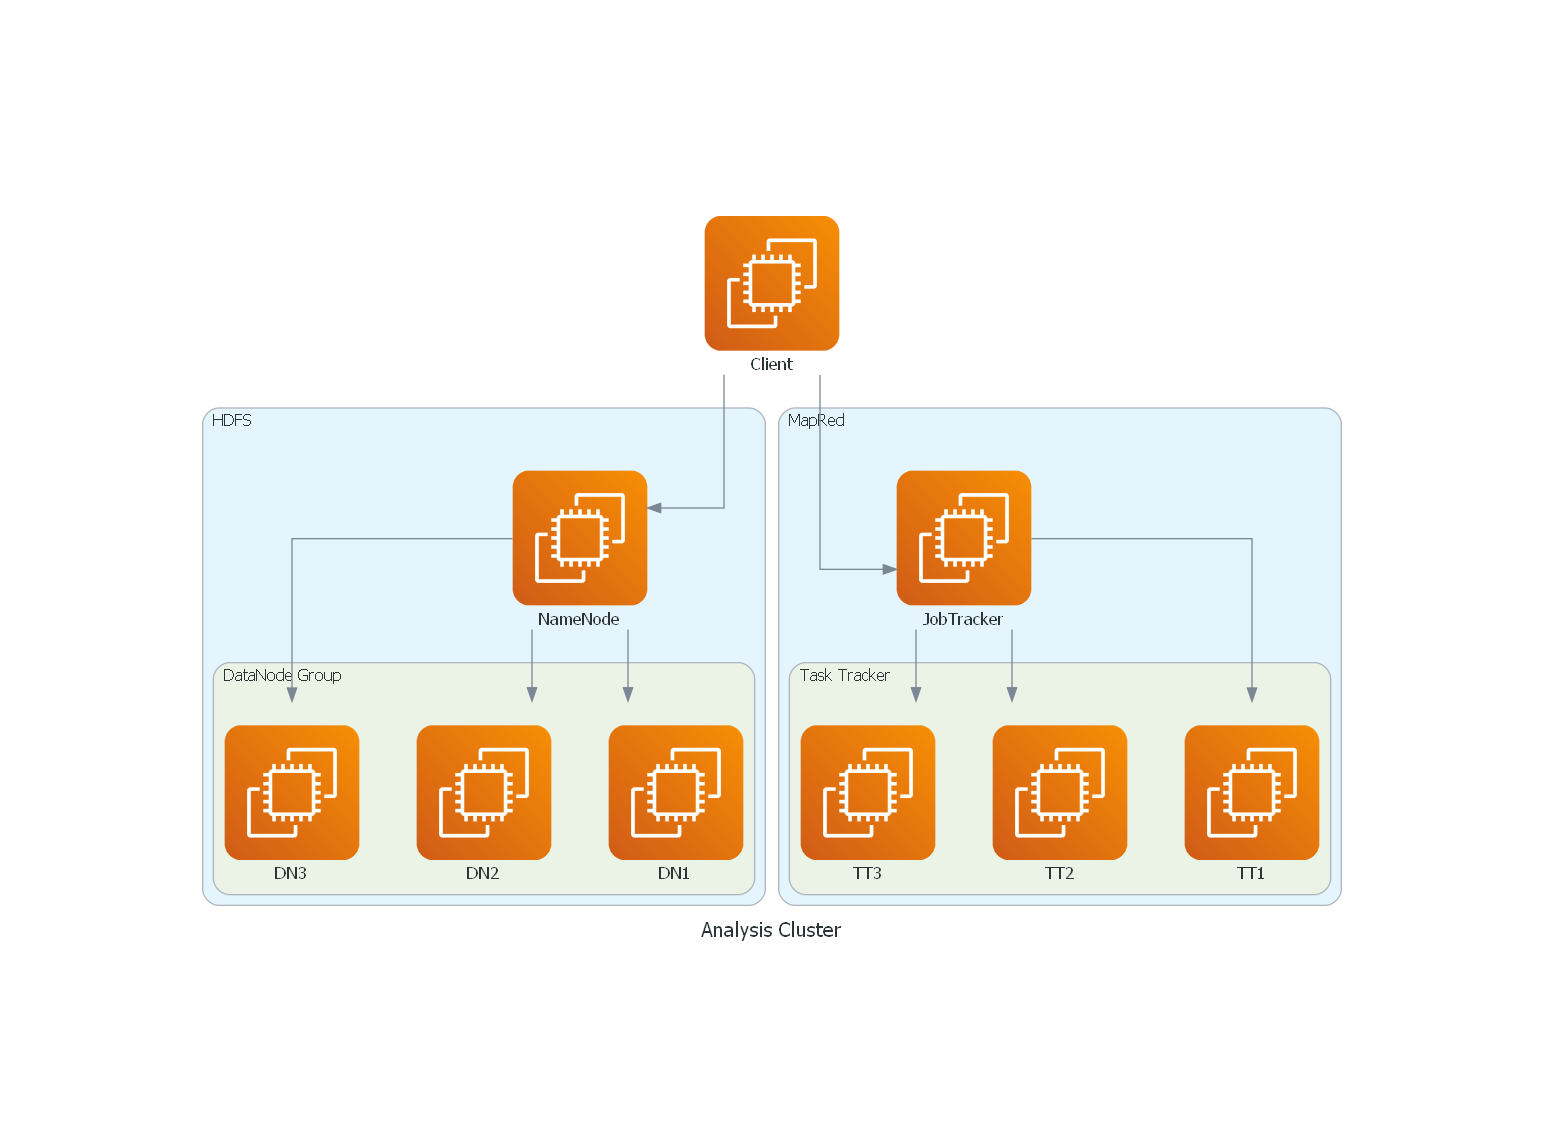

In [2]:
#Data
with Diagram("Analysis Cluster", direction="TB", show=False) as diag:
    client = EC2("Client")
    with Cluster("HDFS"):
        nameNode = EC2("NameNode")
        with Cluster("DataNode Group"):
            datanode_group = [EC2("DN1"),
                             EC2("DN2"),
                             EC2("DN3")]
        client >> nameNode >> datanode_group
    with Cluster("MapRed"):
        jobtracker = EC2("JobTracker")
        with Cluster("Task Tracker"):
            tasktracker_group = [EC2("TT1"),
                                EC2("TT2"),
                                EC2("TT3")]
        client >> jobtracker >> tasktracker_group
diag
        

In [7]:
# DevOps 

from diagrams import Diagram, Edge, Cluster
from diagrams.onprem.vcs import Git
from diagrams.onprem.vcs import Github
from diagrams.onprem.ci import Jenkins
from diagrams.k8s.compute import Deployment
from diagrams.k8s.controlplane import *
from diagrams.k8s.infra import Master, Node, ETCD
from diagrams.onprem.monitoring import Prometheus, Grafana
from diagrams.elastic.elasticsearch import Elasticsearch,Logstash,Kibana


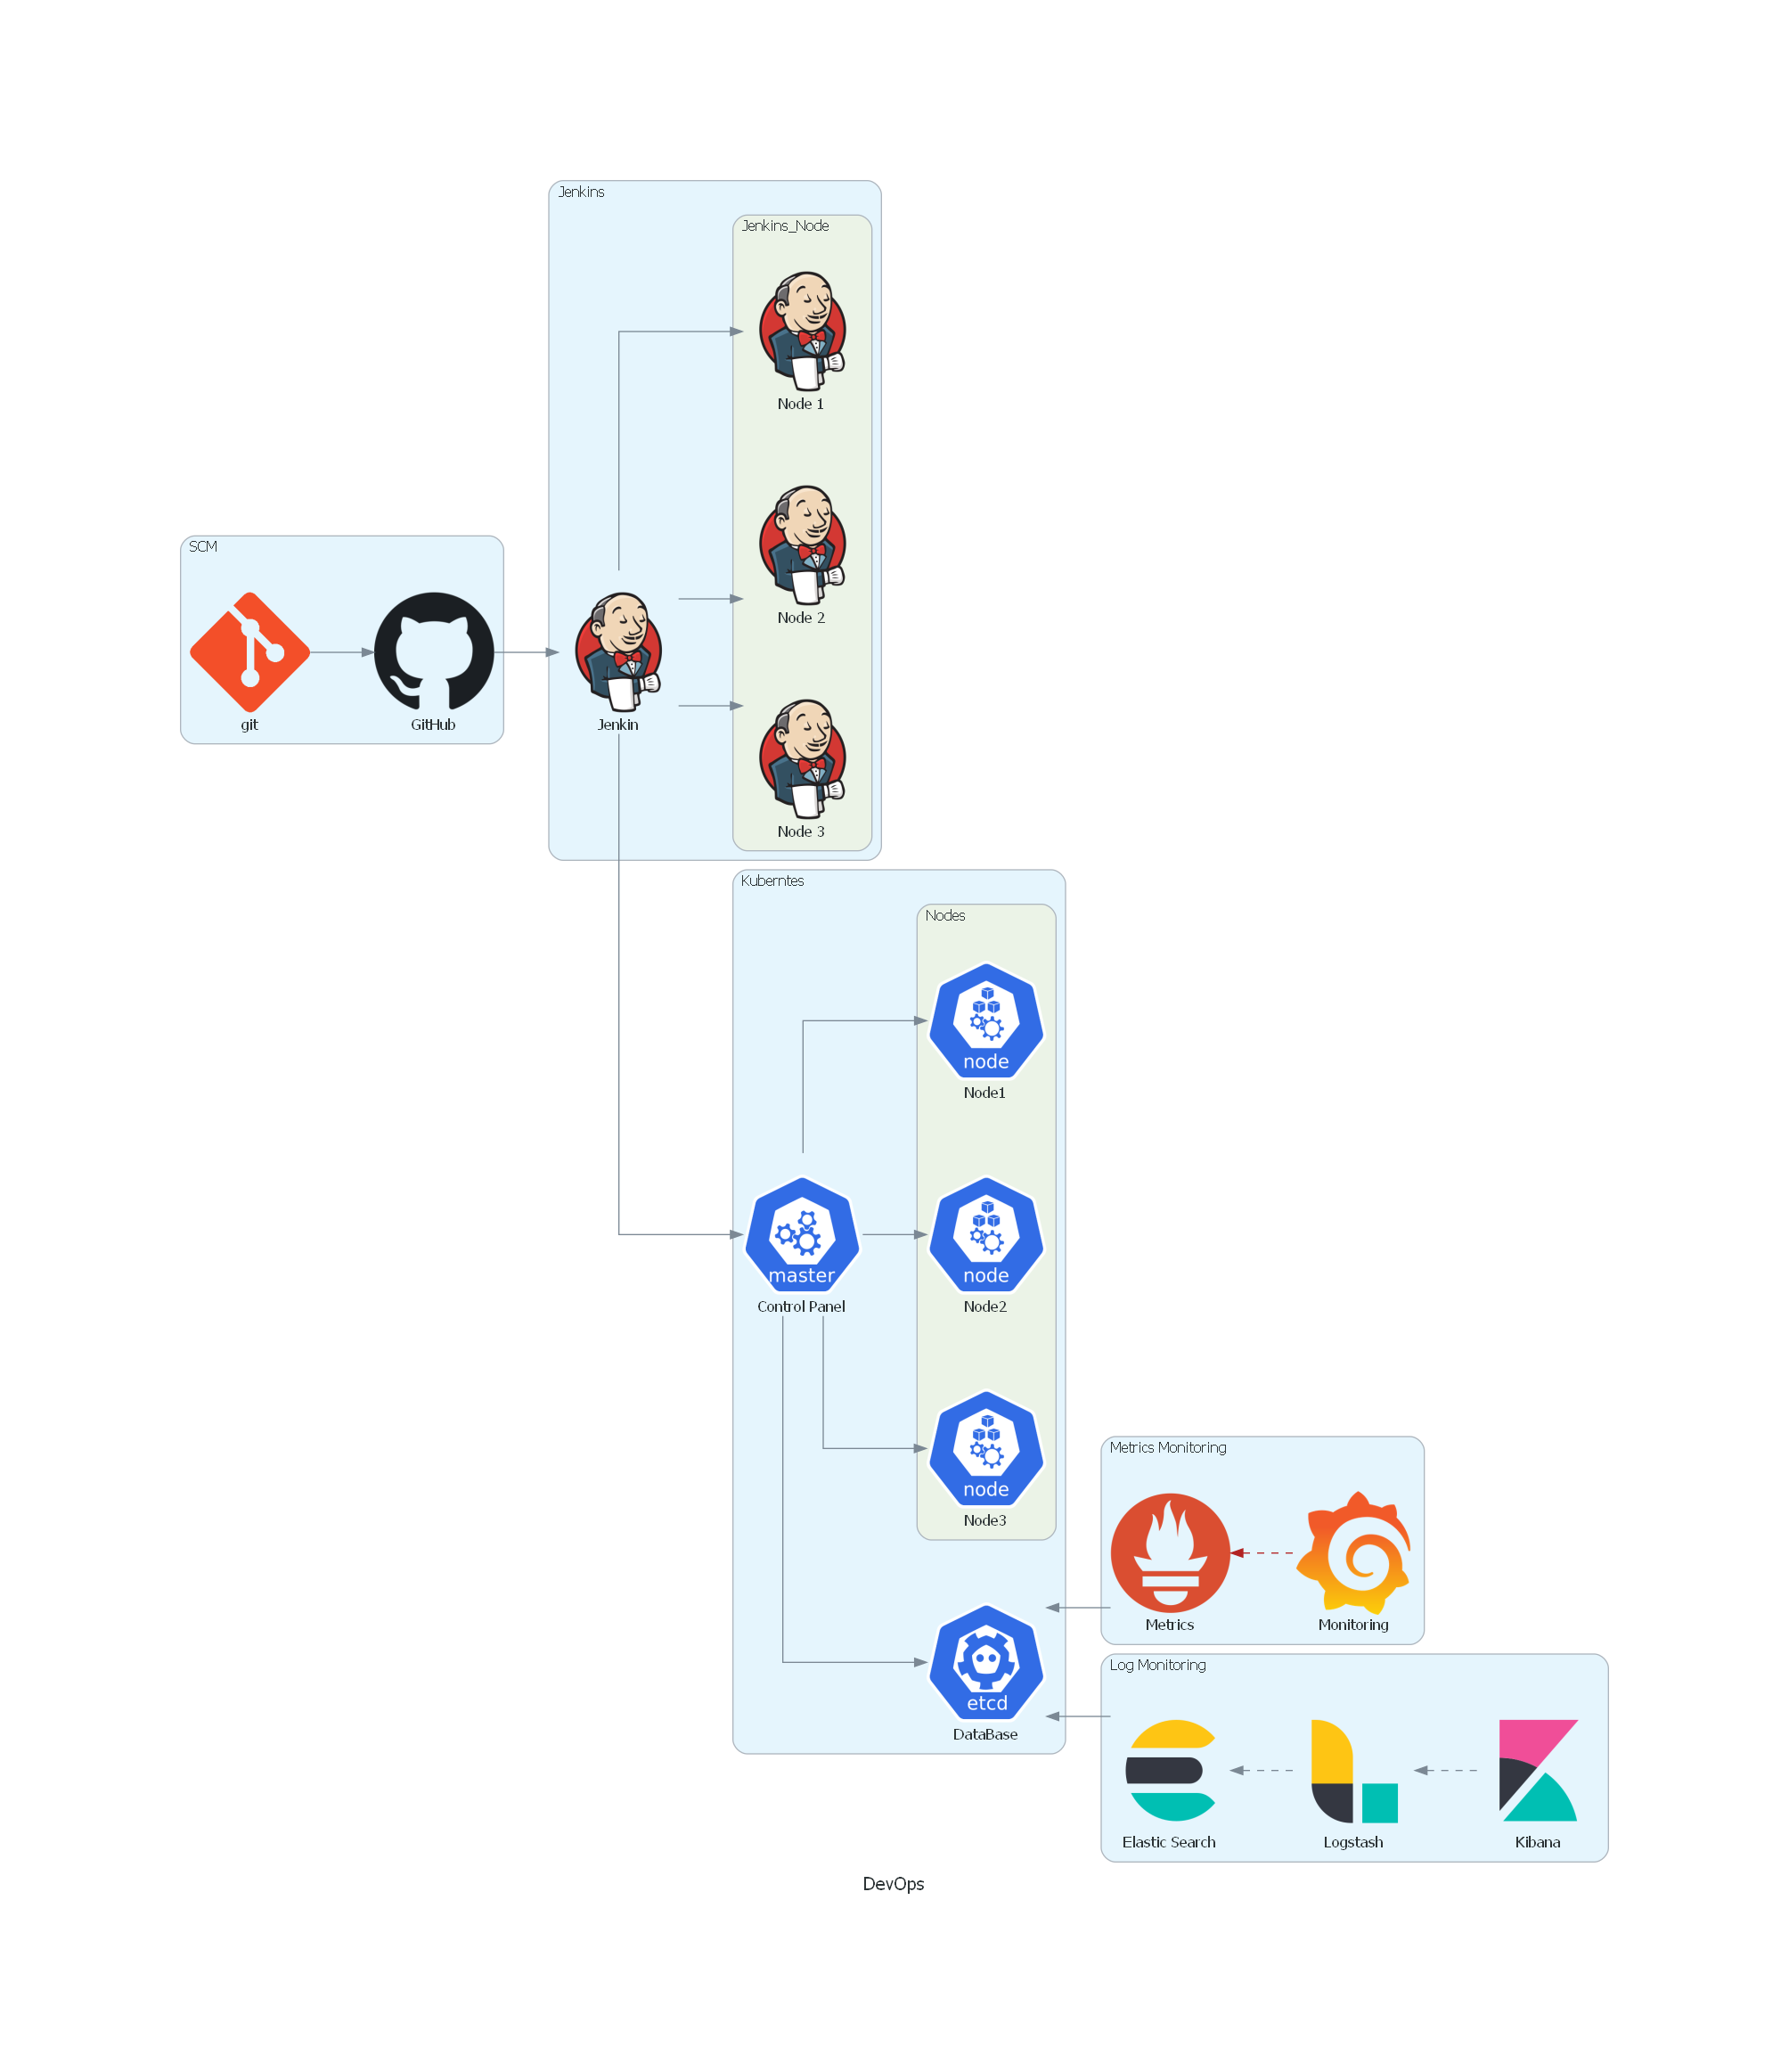

In [10]:
with Diagram("DevOps", show=False) as diag:
    
    # Version Control System
    
    # Define Componetes 
    with Cluster("SCM"):
        local_vcs = Git("git")
        remote_vcs = Github("GitHub")
    
    # CI/CD Tool Jenkins
    with Cluster("Jenkins"):
        ci_master = Jenkins("Jenkin")
        with Cluster("Jenkins_Node"):
            ci_node_group = [Jenkins("Node 1"),
                         Jenkins("Node 2"),
                         Jenkins("Node 3")]
        
    # Platform As A Service Kuberntes 
    with Cluster("Kuberntes"):
        k8s_master = Master("Control Panel")
        database = ETCD("DataBase")
        
        with Cluster("Nodes"):
            node_group = [Node("Node1"),
                          Node("Node2"),
                          Node("Node3")]
            
    # Metrics Monitoring 
    with Cluster("Metrics Monitoring"):
        metrics = Prometheus("Metrics")
        monitoring = Grafana("Monitoring")
        
    # Log Monitoring 
    with Cluster("Log Monitoring"):
        elastic_search = Elasticsearch("Elastic Search")
        logstash = Logstash("Logstash")
        kibana = Kibana("Kibana")
    
    
    # Connect Componenets of SCM 
    local_vcs >> remote_vcs
    #connect Jenkins
    ci_master >> k8s_master
    k8s_master >>  database
    
    remote_vcs >> ci_master   
    database << metrics << Edge(color="firebrick", style="dashed") << monitoring
    k8s_master >> node_group
    ci_master >> ci_node_group
    
    # ELK Connection 
    database << elastic_search << Edge(style="dashed") << logstash << Edge(style="dashed") << kibana
diag